In [1]:
import pandas as pd
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt
from scipy.stats.mstats import gmean
from scipy import stats
from scipy.stats.mstats import winsorize
from collections import Counter
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import norm
from statistics import stdev
import seaborn as sns
from sklearn import preprocessing
from scipy.stats import genextreme
from scipy.stats import gumbel_r

from scipy.stats import weibull_min
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
AI_price=pd.read_csv('Aluminium.csv',delimiter=',',usecols=[1],header=0,index_col=False)

AI_price = AI_price['Close'][::-1][1:]





In [3]:
CU_price=pd.read_csv('Copper.csv',delimiter=',',usecols=[1],header=0,index_col=False)

CU_price = CU_price['Close'][::-1]



-0.03998416501043133


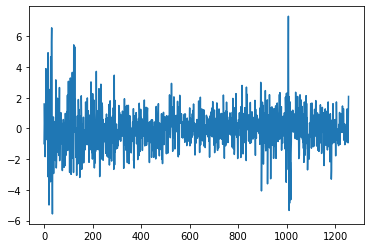

In [4]:
AI_rate_l = []

#AI_price = np.diff(AI_price)



for i in range(len(AI_price)-1):
    AI_rate = np.log(AI_price[i+1]/AI_price[i])
    AI_rate_l.append(AI_rate*100)

std_AI = np.std(AI_rate_l)

var_AI = np.var(AI_rate_l)     
    
plt.plot(AI_rate_l)  # Stopa zwrotu aluminium

E_AI_r = np.mean(AI_rate_l) #Średnia stopa zwrotu AI


print(E_AI_r)

-0.047020029426501214


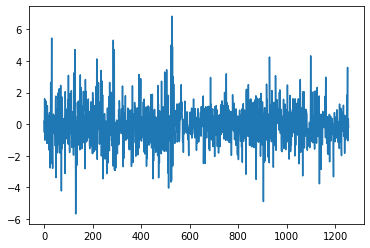

In [5]:
CU_rate_l = []

#CU_price = np.diff(CU_price)




for i in range(len(CU_price)-1):
    CU_rate = np.log((CU_price[i+1]/CU_price[i]))
    CU_rate_l.append(CU_rate*100)

std_CU = np.std(CU_rate_l)

var_CU = np.var(CU_rate_l)
    
plt.plot(CU_rate_l) # Stopa zwrotu miedzi

E_CU_r = np.mean(CU_rate_l) #Średnia stopa zwrotu CU

print(E_CU_r)

## Stopa zwrotu portfela


Odchylenie standardowe dla portfela:  1.1037763185222584
-0.04139485582585334
ryzyko portfela 1.2183221613305502


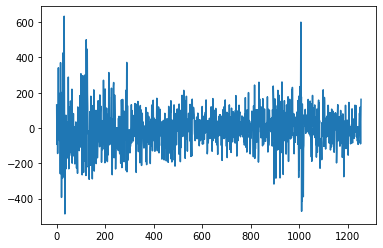

In [6]:
W_rate_l = []



#odchylenie standardowe portfela
W_sigma=np.sqrt((0.7995*std_AI)**2 + (0.2005*std_CU)**2 + 2*0.2005*0.7995*np.cov(AI_rate_l,CU_rate_l)[0][1])
print("Odchylenie standardowe dla portfela: ",W_sigma)

for i in range(len(CU_rate_l)):
    W_rate = 0.2005 * CU_rate_l[i] + 0.7995 * AI_rate_l[i]
    W_rate_l.append(W_rate*100)
    


plt.plot(W_rate_l)

E_W_r = 0.2005 * E_CU_r + 0.7995 * E_AI_r

print(E_W_r)

print('ryzyko portfela', W_sigma**2)

## Możliwe portfele 

-0.0434774470428344


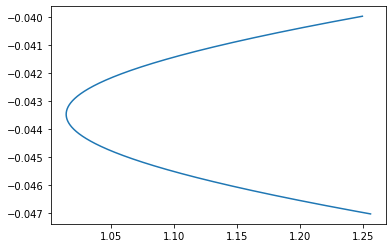

In [7]:
t = np.linspace(0,1,1000)
x_list = []
y_list = []
for i in range(len(t)):
    a = t[i]
    b = (1-t[i])
    x = np.sqrt((b*std_AI)**2 + (a*std_CU)**2 + 2*a*b*np.cov(AI_rate_l,CU_rate_l)[0][1])
    y = a * E_CU_r + b * E_AI_r
    
    x_list.append(x)
    y_list.append(y)
    
    
plt.plot(x_list,y_list)

for i in range(len(x_list)):
    if x_list[i]==min(x_list):
        print(y_list[i])


## Portfel o minimalnym ryzyku

minimalne ryzyko przy wagach 0.4964964964964965 przy CU i 0.5035035035035035 przy AI


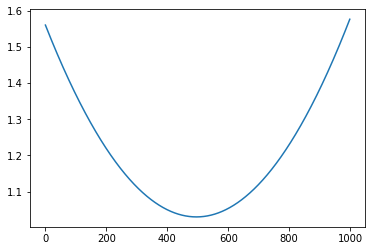

In [8]:
s = np.linspace(0,1,1000)
risk_list = []
for i in range(len(s)):
    a = s[i]
    b = (1-s[i])
    risk = (b*std_AI)**2 + (a*std_CU)**2 + 2*a*b*np.cov(AI_rate_l,CU_rate_l)[0][1]
    risk_list.append(risk)
    
plt.plot(risk_list)

result = np.where(risk_list == min(risk_list))


print('minimalne ryzyko przy wagach',  s[result[0][0]], "przy CU i", 1-s[result[0][0]], "przy AI")


## Portfel o minimalnym ryzyku przy ustalonej stopie zwrotu


In [9]:
R=-0.043 #<- ustalona stopa zwrotu
V=np.cov(AI_rate_l,CU_rate_l)
s = np.linspace(0,1,1000)
risk_list = []
for i in range(len(s)):
    a = s[i]
    b = (1-s[i])
    risk = (b*std_AI)**2 + (a*std_CU)**2 + 2*a*b*np.cov(AI_rate_l,CU_rate_l)[0][1]
    if R-0.0001<a * E_CU_r + b * E_AI_r<R+0.0001 :
        risk_list.append((risk,a))
    
#print(risk_list)
    
#print()


print('Dla ustalonej stopy zwrotu R=-0.043% minimalne ryzyko przy wagach',  min(risk_list[:])[1], "przy CU i", 1-min(risk_list[:])[1], "przy AI")



Dla ustalonej stopy zwrotu R=-0.043% minimalne ryzyko przy wagach 0.44244244244244246 przy CU i 0.5575575575575575 przy AI


In [17]:
R_f=0.63#<-bierząca rentowność obligacji skarbowych w procentach
R_e=-0.04347
sig_e=1.0296
premia_list=[]

s = np.linspace(0,0.99,1000)
for i in range(len(s)):
    w1 = s[i]
    w2 = (1-s[i])
    sig_p = w2*sig_e
    ERp= R_f + sig_p*(R_e - R_f)/sig_e
    premia = (ERp - R_f)/sig_p
    premia_list.append(premia)
    
#plt.plot(premia_list)

result = np.where(premia_list == max(premia_list))


print('Dla portfela rynkowego ', 'wf=', s[result[0][0]], '1-wf=',1-s[result[0][0]])

Dla portfela rynkowego  wf= 0.9890090090090091 1-wf= 0.010990990990990879
